In [153]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#import mpld3
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import filter_output_reader as freader
from importlib import reload


import scipy.stats as stats

%matplotlib inline

In [154]:
example_datafile = '../python/example_data.txt'
filter_config = '../cpp/connectivity_8.txt'
output_data = '../cpp/test_output.txt'

In [155]:
reload(freader)
dns_data = freader.read_dns_data(example_datafile)
nodes, conn = freader.read_filter_configuration(filter_config)
filter_result = freader.read_output_data(output_data)

Reading data from:   ../python/example_data.txt
Filter defined in:   connectivity_8.txt


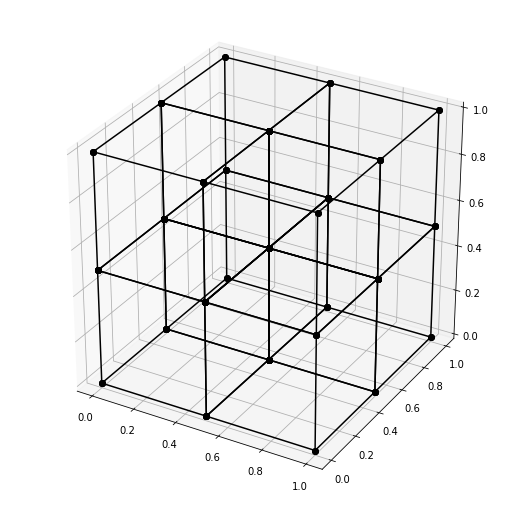

In [156]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
eid = 1
freader.plot_hex(1, nodes, conn, ax)
freader.plot_hex(2, nodes, conn, ax)
freader.plot_hex(3, nodes, conn, ax)
freader.plot_hex(4, nodes, conn, ax)
freader.plot_hex(5, nodes, conn, ax)
freader.plot_hex(6, nodes, conn, ax)
freader.plot_hex(7, nodes, conn, ax)
freader.plot_hex(8, nodes, conn, ax)
plt.savefig('filter_8_initial.pdf')
#freader.plot_filter_cgs(10, 0, filter_result, ax)
#freader.plot_filter_cgs(2, 0, filter_result, ax)

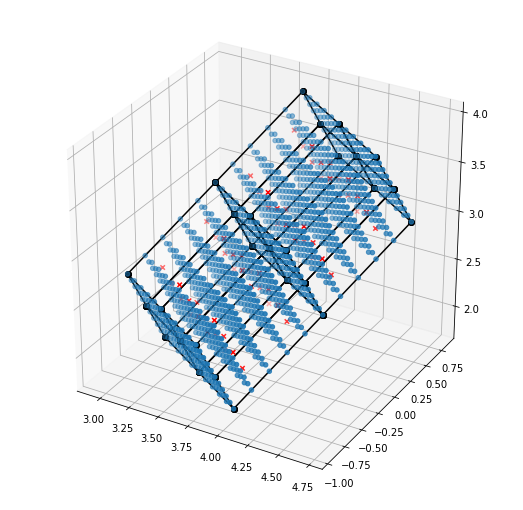

In [157]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

#eid = 10
#t = 0.0
#freader.plot_hex_filter(eid, t, filter_result, ax)
#freader.plot_filter_cgs(eid, t, filter_result, ax)
#eid = 2
#t = 0.0
#freader.plot_hex_filter(eid, t, filter_result, ax)
#freader.plot_filter_cgs(eid, t, filter_result, ax)

t = 1

eid = 1
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 2
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 3
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 4
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 5
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 6
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 7
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 8
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
ax.scatter(*zip(*dns_data[t]))

#eid = 10
#t = 1.0
##ax.scatter(*zip(*dns_data[t]))
#freader.plot_hex_filter(eid, t, filter_result, ax)
#freader.plot_filter_cgs(eid, t, filter_result, ax)

plt.savefig('filter_8_final.pdf')

In [158]:
tmp = filter_result[1][1].dof_values[0,3:]


D = np.array([[tmp[0], tmp[5], tmp[4]],\
              [tmp[8], tmp[1], tmp[3]],\
              [tmp[7], tmp[6], tmp[2]]])

Csq = np.matmul(D.T, D)
Csq

array([[ 3.62861224, -0.52581846, -2.3403413 ],
       [-0.52581846,  1.57060021, -0.52973999],
       [-2.3403413 , -0.52973999,  2.23487899]])

In [159]:
np.random.seed(123)
X = np.random.rand(9).reshape((3, 3))
print("X:\n",X)
A = X.dot(X)
print("A:\n",A)

Xs = freader.matsqrt(A)
np.allclose(Xs.dot(Xs), A)

X:
 [[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]]
A:
 [[0.86530995 0.56051022 0.38816255]
 [1.19559529 0.96514433 0.63296392]
 [1.53230958 1.10270543 0.74353916]]


/projects/nathanm/micromorphic/micromorphic_library/overlap_coupling/src/python/filter_output_reader.py:556: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = np.linalg.norm(R)


True

In [160]:
A = X.T.dot(X)
print(A, np.linalg.matrix_rank(A))
Xs = freader.matsqrt(A, mode=2)
np.allclose(Xs.T.dot(Xs), A)

[[1.75091571 1.26759759 0.86294068]
 [1.26759759 1.06850309 0.69867956]
 [0.86294068 0.69867956 0.46177615]] 3


True

In [161]:
A = X.dot(X.T)
print(A, np.linalg.matrix_rank(A))
Xs = freader.matsqrt(A, mode=3)
np.allclose(Xs.dot(Xs.T), A)

[[0.61840663 0.68582444 0.98812887]
 [0.68582444 1.00060265 1.23690893]
 [0.98812887 1.23690893 1.66218568]] 3


True

In [162]:
freader.matsqrt(Csq, mode=2)

array([[ 1.68361822, -0.2794501 , -0.84613804],
       [-0.2794501 ,  1.17802648, -0.32366876],
       [-0.84613804, -0.32366876,  1.18918793]])

In [163]:
filter_result[0.1][1]

MicromorphicFilterData:
 nodes:
   +0.3200 -0.0500 +0.2000
   +0.8649 +0.0176 +0.2336
   +0.8210 +0.4913 +0.2993
   +0.2761 +0.4237 +0.2657
   +0.2962 -0.1403 +0.6862
   +0.8411 -0.0727 +0.7199
   +0.7972 +0.4010 +0.7856
   +0.2523 +0.3334 +0.7519
 dof values:
   +0.3200 -0.0500 +0.2000 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.3649 +0.0176 +0.2336 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.3210 -0.0087 +0.2993 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.2761 -0.0763 +0.2657 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.2962 -0.1403 +0.1862 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.3411 -0.0727 +0.2199 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.2972 -0.0990 +0.2856 +0.0898 -0.0527 -0.0276 -0.1806 -0.0476 -0.0877 +0.1314 +0.0673 +0.1352
   +0.2523 -0.1666 +0.2519 +0.0898 -0.0527 -0.

In [66]:
def get_expected_normal_area(filter_t0, filter_t, gp, f):
    D = freader.from_voigt(filter_t.dof_values[gp][3:]) + np.eye(3)
    N = filter_t0.gauss_point_info.surface_normal[gp][f]
    dA = filter_t0.gauss_point_info.surface_area[gp][f]
    jd = np.linalg.det(D)
    Dinv = np.linalg.inv(D)
    
    dan = jd*dA*Dinv.T.dot(N)
    da = np.linalg.norm(dan)
    n = dan/da
    return n, da

get_expected_normal_area(filter_result[0][4], filter_result[1][4], 0, 0)

(array([-0.46110064, -0.83651346, -0.29602606]), 0.03301287607683754)

In [13]:
u = filter_result[1][4].dof_values[0][:3]
phi_ = filter_result[1][4].dof_values[0][3:]

phi = np.array([[phi_[0], phi_[5], phi_[4]],\
                [phi_[8], phi_[1], phi_[3]],\
                [phi_[7], phi_[6], phi_[2]]])

chi = phi + np.eye(3)

C = freader.matsqrt(chi.T.dot(chi), mode=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f916656e9b0>)

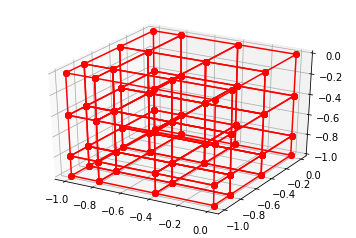

In [14]:
import python_plot as pp
data = pp.read_gnu_data('../cpp/temp.gnu')
pp.plot_3d(data)

In [15]:
import sympy
sympy.init_printing()

zero = sympy.S(0)

normal_str = 'n1 n2 n3'
normal = sympy.symbols(normal_str)

micro_stress_str = "sigma11 sigma22 sigma33 sigma23 sigma13 sigma12"
micro_stress_vec = sympy.symbols(micro_stress_str)
micro_stress = [[micro_stress_vec[0], micro_stress_vec[5], micro_stress_vec[4]],\
                [micro_stress_vec[5], micro_stress_vec[1], micro_stress_vec[3]],\
                [micro_stress_vec[4], micro_stress_vec[3], micro_stress_vec[2]]]

traction = [zero for _ in range(3)]

for i in range(3):
    for j in range(3):
        traction[i] += normal[j]*micro_stress[j][i]
        
traction

for i in range(3):
    outstr = "traction[{0}] = ".format(i)

    for j, n in enumerate(normal):
        term = sympy.diff(traction[i], n)
        
        for k, s in enumerate(micro_stress_vec):
            if (sympy.diff(term, s) != 0):
                outstr += "itiM->second.das[j][{0}]*micro_tensor[{1}]+".format(j, k)
        
    outstr = outstr[:-1] + ";"
    
    
    print(outstr)
traction

traction[0] = itiM->second.das[j][0]*micro_tensor[0]+itiM->second.das[j][1]*micro_tensor[5]+itiM->second.das[j][2]*micro_tensor[4];
traction[1] = itiM->second.das[j][0]*micro_tensor[5]+itiM->second.das[j][1]*micro_tensor[1]+itiM->second.das[j][2]*micro_tensor[3];
traction[2] = itiM->second.das[j][0]*micro_tensor[4]+itiM->second.das[j][1]*micro_tensor[3]+itiM->second.das[j][2]*micro_tensor[2];


In [137]:
xi_str = 'xi1 xi2 xi3'
xi = sympy.symbols(xi_str)
couple_traction = [[zero for _ in range(3)] for __ in range(3)]

for j in range(3):
    for k in range(3):
        for i in range(3):
            couple_traction[j][k] += normal[i]*micro_stress[i][j]*xi[k]
            
def to_voigt(matrix):
    order = [(0, 0), (1, 1), (2, 2), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0)]
    
    return [matrix[o[0]][o[1]] for o in order]
        
    
voigt_couple_traction = to_voigt(couple_traction)

for indx, vct in enumerate(voigt_couple_traction):
    outstr = "                    couple_traction[{0}] = ".format(indx)
    for i, n in enumerate(normal):
        term = sympy.diff(vct, n)
        if (term != zero):
            outstr += "itiM->second.das[j][{0}]".format(i)
            for j, s in enumerate(micro_stress_vec):
                term2 = sympy.diff(term, s)
                if (term2 != zero):
                    outstr += "*itv->second[{0}]".format(j)
                    
                    for k, xik in enumerate(xi):
                        term3 = sympy.diff(term2, xik)
                        if (term3 != zero):
                            outstr += "*xi[{0}]\n".format(k)
            outstr += "                                       + "
    last = outstr.rfind("\n")
    outstr = outstr[:last] + ";\n"
    print(outstr)
                


                    couple_traction[0] = itiM->second.das[j][0]*itv->second[0]*xi[0]
                                       + itiM->second.das[j][1]*itv->second[5]*xi[0]
                                       + itiM->second.das[j][2]*itv->second[4]*xi[0];

                    couple_traction[1] = itiM->second.das[j][0]*itv->second[5]*xi[1]
                                       + itiM->second.das[j][1]*itv->second[1]*xi[1]
                                       + itiM->second.das[j][2]*itv->second[3]*xi[1];

                    couple_traction[2] = itiM->second.das[j][0]*itv->second[4]*xi[2]
                                       + itiM->second.das[j][1]*itv->second[3]*xi[2]
                                       + itiM->second.das[j][2]*itv->second[2]*xi[2];

                    couple_traction[3] = itiM->second.das[j][0]*itv->second[5]*xi[2]
                                       + itiM->second.das[j][1]*itv->second[1]*xi[2]
                                       + itiM->second.das[j

In [133]:
voigt_couple_traction[3]

In [151]:
ntmp = np.array([1, 0, 0])
stmp = np.diag([2, -1, 3])

ttmp = np.zeros([3,])

for i in range(3):
    for j in range(3):
        ttmp[i] += ntmp[j]*stmp[j,i]
print(ttmp)
xi = np.array([0.125, 0, 0])

ctmp = np.zeros([3, 3])
for i in range(3):
    for j in range(3):
        ctmp[i][j] = ttmp[i]*xi[j]
ctmp

[2. 0. 0.]


array([[0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ]])

In [152]:
ntmp = -ntmp
ttmp = np.zeros([3,])

for i in range(3):
    for j in range(3):
        ttmp[i] += ntmp[j]*stmp[j,i]
print(ttmp)

xi = -np.array([0.125, 0, 0])

ctmp = np.zeros([3, 3])
for i in range(3):
    for j in range(3):
        ctmp[i][j] = ttmp[i]*xi[j]
ctmp


[-2.  0.  0.]


array([[ 0.25,  0.  ,  0.  ],
       [-0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  ]])